# Рисование графиков

## Введение

Документация:

http://scipy.org/docs.html

Магическая строчка и используемые пакеты:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Чтобы графики были побольше
plt.rcParams["figure.figsize"] = (10, 6)

linspace(start, stop, num) - возвращает массив, заполненный арифметической прогрессией от start до stop включительно, количество элементов - num (по умолчанию 50).

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html

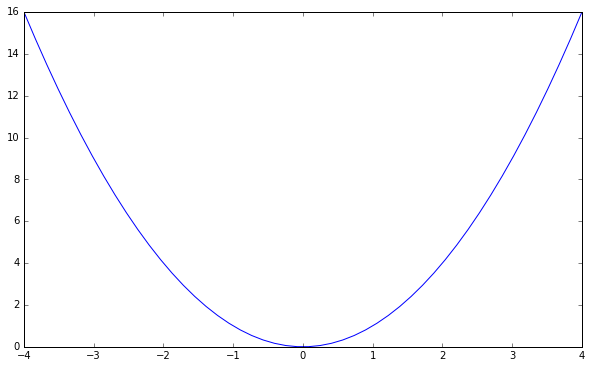

In [101]:
x = np.linspace(-4, 4)
y = x*x
plt.plot(x, y)
plt.show()

arange(start, stop, step) - массив значений, равномерно распределённых в интервале [start, stop), с шагом step. Минус arange в том, что stop не добавляется в массив.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html

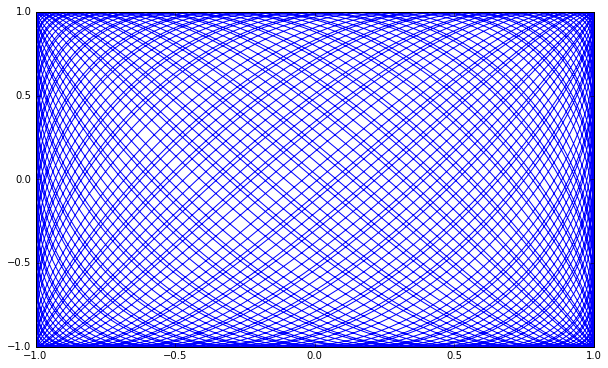

In [102]:
t = np.arange(0, 300, 0.01)
x = np.cos(t)
y = np.cos(np.sqrt(2) * t)
plt.plot(x, y)
plt.show()

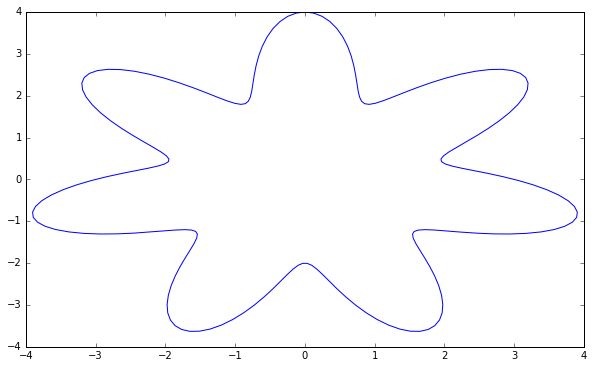

In [103]:
a = np.linspace(0, 2*np.pi, 200)
d = np.cos(a*7) + 3
x = d * np.sin(a)
y = d * np.cos(a)
plt.plot(x, y)
plt.show()

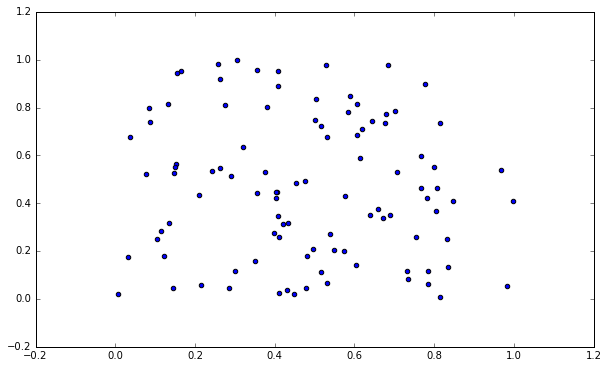

In [104]:
x = np.random.rand(100)
y = np.random.rand(100)
plt.scatter(x, y)
plt.show()

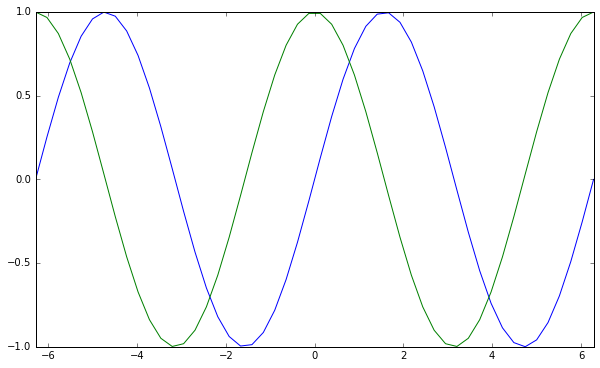

In [105]:
x = np.linspace(-2*np.pi, 2*np.pi)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.xlim([x[0], x[-1]])
plt.show()

## Параметры графика

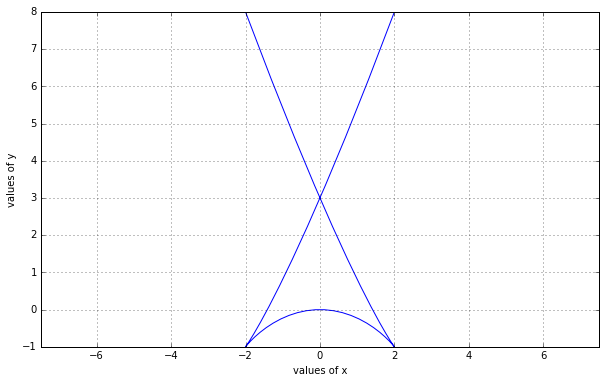

In [106]:
t = np.linspace(-2, 2)
x = t*t*t - 3*t
y = t*t*t*t - 2*t*t
plt.plot(x, y)
plt.xlabel('values of x')
plt.ylabel('values of y')
plt.axes().set_aspect('equal', 'datalim')
plt.grid(True)
plt.show()

## Интерактив
### Простейший вариант

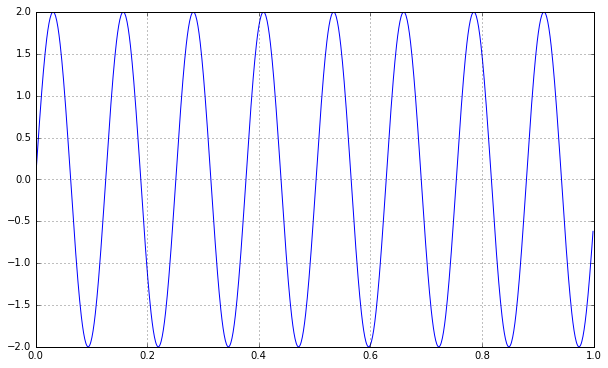

<function __main__.drawSin>

In [107]:
from ipywidgets import *

x = np.arange(0, 1, 0.001)

def drawSin(a, b):
    plt.plot(x, np.sin(a*x) + np.sin(b*x))
    plt.ylim([-2, 2])
    plt.grid(True)
    plt.show()
    
interact(drawSin, a=(1, 100, 1), b=(1, 100, 1))

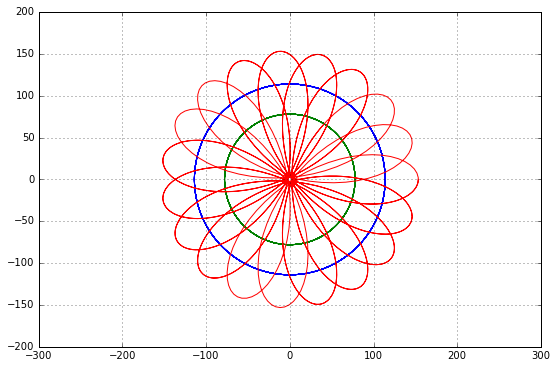

In [2]:
from ipywidgets import *

# r1 - радиус внешней окружности.
# r2 - радиус круга, который катится по окружности.
# s - относительное положение карандаша на внутреннем круге.
#     Если карандаш закреплён на окружности, то s = 1
def hypotrochoid(r1, r2, s):
    a = np.linspace(0, 20*np.pi, 1000)

    # Внешняя окружность, по которой катится внутренняя
    x = r1*np.cos(a)
    y = r1*np.sin(a)
    plt.plot(x, y)

    # Траектория центра внутренней окружности
    x = (r1-r2)*np.cos(a)
    y = (r1-r2)*np.sin(a)
    plt.plot(x, y)

    # Траектория точки на внутренней окружности
    x = x + s*r2*np.cos((1 - r1/r2)*a)
    y = y + s*r2*np.sin((1 - r1/r2)*a)
    plt.plot(x, y)

    plt.xlim(-300, 300)
    plt.ylim(-200, 200)
    plt.axes().set_aspect('equal')
    plt.grid(True)
    plt.show()

interact(hypotrochoid, 
         r1=widgets.IntSlider(min=0, max=150, step=1, value=120),
         r2=widgets.IntSlider(min=0, max=150, step=1, value=24),
         s=widgets.FloatSlider(min=0, max=5, step=0.1, value=1))

In [13]:
from ipywidgets import *
from IPython.display import display

x = 1

def func(btn):
    global x
    x = x*2
    print(x)

btn = widgets.Button(description="Click me!")
btn.on_click(func)
display(btn)

2
4
8
16
32
64
128


## Карты
Сетка точек создаётся с помощью np.meshgrid. Он получает на вход независимые x и y, а возвращает два параллельных массива, описывающих координаты x и y точек, полученных перебором координат из исходных независимых массивов.

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]
[[0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2]
 [4 4 4 4 4 4 4 4 4 4]
 [6 6 6 6 6 6 6 6 6 6]
 [8 8 8 8 8 8 8 8 8 8]]
[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          1.41421356  2.          2.44948974  2.82842712  3.16227766
   3.46410162  3.74165739  4.          4.24264069]
 [ 0.          2.          2.82842712  3.46410162  4.          4.47213595
   4.89897949  5.29150262  5.65685425  6.        ]
 [ 0.          2.44948974  3.46410162  4.24264069  4.89897949  5.47722558
   6.          6.4807407   6.92820323  7.34846923]
 [ 0.          2.82842712  4.          4.89897949  5.65685425  6.32455532
   6.92820323  7.48331477  8.          8.48528137]]


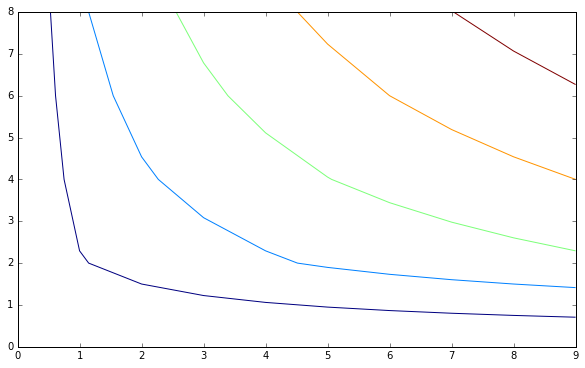

In [109]:
x, y = np.meshgrid(np.arange(0, 10, 1),  np.arange(0, 10, 2))
print(x)
print(y)
z = np.sqrt(x*y)
print(z)
plt.contour(x, y, z)
plt.show()

## Массив пикселей
http://matplotlib.org/users/image_tutorial.html

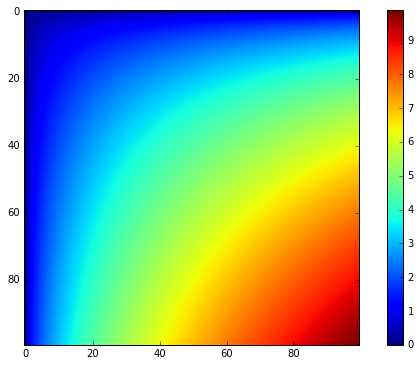

In [110]:
x, y = np.meshgrid(np.arange(0, 10, 0.1),  np.arange(0, 10, 0.1))
z = np.sqrt(x*y)

plt.imshow(z)
plt.colorbar()
plt.show()

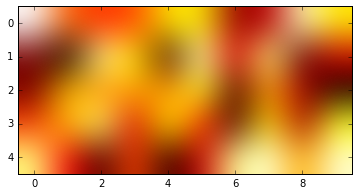

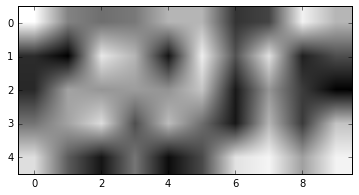

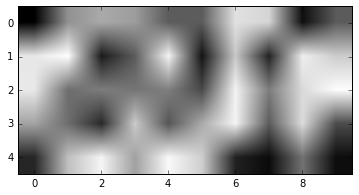

In [22]:
z = np.random.rand(50).reshape(5, 10)
plt.imshow(z, cmap="hot", interpolation="bicubic")
plt.show()
plt.imshow(z, cmap="gray", interpolation="bilinear")
plt.show()
plt.imshow(z, cmap="Greys", interpolation="bilinear")
plt.show()

1
1


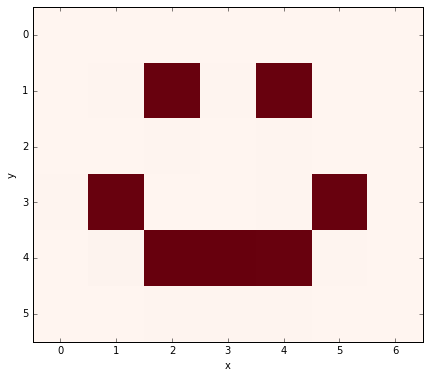

In [112]:
z = np.array([
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
    ])
print(z[1][2])
print(z[1,2])
plt.imshow(z, cmap="Reds", interpolation="none")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

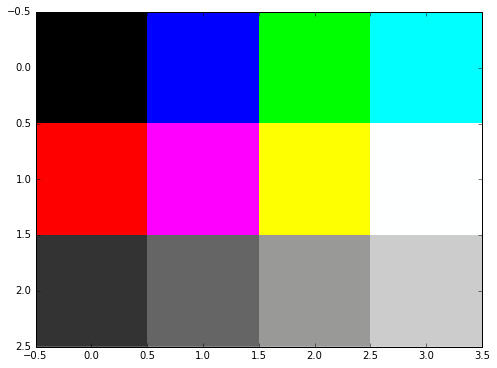

In [113]:
z = np.array([
        [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1]],
        [[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]],
        [[0.2, 0.2, 0.2], [0.4, 0.4, 0.4], [0.6, 0.6, 0.6], [0.8, 0.8, 0.8]]
    ])
plt.imshow(z, interpolation="none")
plt.show()

Ещё один способ задать двумерную сетку

In [114]:
def f(x, y):
    return x + 10 * y
np.fromfunction(f, (4, 5))

array([[  0.,  10.,  20.,  30.,  40.],
       [  1.,  11.,  21.,  31.,  41.],
       [  2.,  12.,  22.,  32.,  42.],
       [  3.,  13.,  23.,  33.,  43.]])

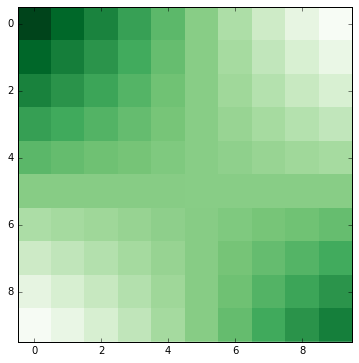

In [115]:
z = np.fromfunction(lambda x, y: (x - 5)*(y - 5), (10, 10))
plt.imshow(z, cmap="Greens", interpolation="none")
plt.show()

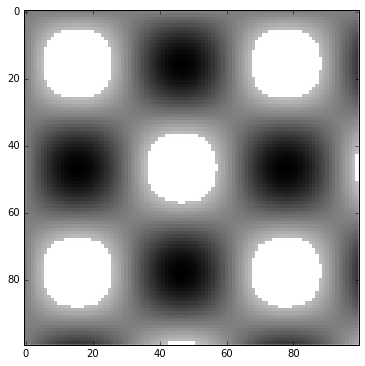

In [123]:
def draw(threshold):
    x, y = np.meshgrid(np.linspace(0, 10, 100),  np.linspace(0, 10, 100))
    z = np.sin(x) * np.sin(y)
    z = z.reshape(10000)
    z[z > threshold] = 1
    z = z.reshape(100, 100)
    plt.imshow(z, cmap="gray", interpolation="none")
    plt.show()

interact(draw, threshold=(-1, 1, 0.1))

Ещё один хитрый способ создать двумерную сетку. Но это ненужный изврат.

In [117]:
x = np.array([[0, 1, 2]])
y = np.array([[0], [10], [20]])
x + y

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22]])

Он же, но с помощью np.ogrid

In [118]:
y, x = np.ogrid[0:4, 0:3]
print('x =', x)
print('y =', y)
z = x + 10*y
print('z =', z)

x = [[0 1 2]]
y = [[0]
 [1]
 [2]
 [3]]
z = [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


## 3D
http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

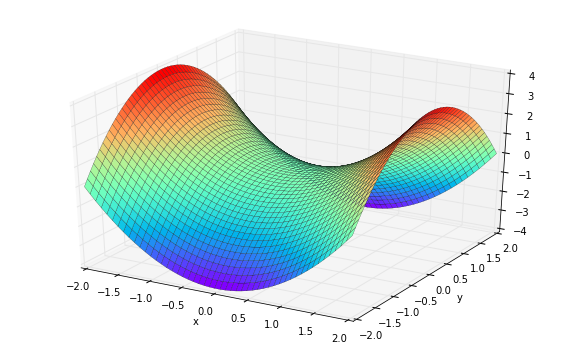

In [119]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x, y = np.meshgrid(np.linspace(-2, 2), np.linspace(-2, 2))
z = x**2 - y**2

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="rainbow", linewidth=0.2)

plt.xlabel('x')
plt.ylabel('y')

plt.show()


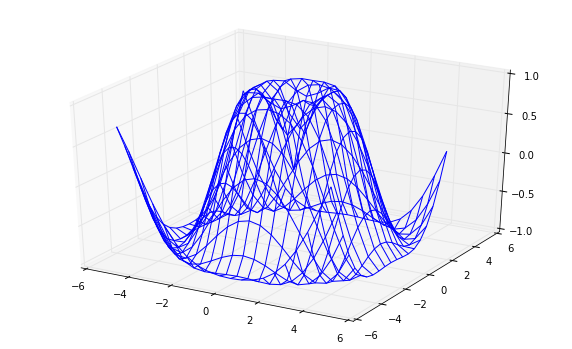

In [120]:
x, y = np.meshgrid(np.arange(-5, 5, 0.5), np.arange(-5, 5, 0.5))
z = np.sin(np.sqrt(x**2 + y**2))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(x, y, z)
plt.show()

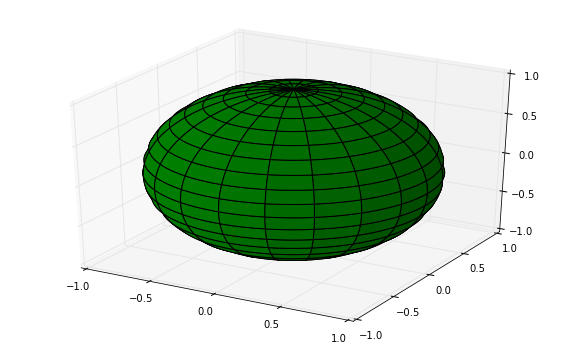

In [121]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

u = np.linspace(0, 2 * np.pi, 200)
v = np.linspace(0, np.pi, 200)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='g')
plt.show()